# Predicting Car Prices
This ML project aims to predict car prices using features and technical aspects like car model, fuel type, engine type, engine size, car dimensions, weight, horsepower, mileage etc.

Dataset is taken from UCI ML Repository and is available [here](https://archive.ics.uci.edu/ml/datasets/automobile)

## Outline

1) **Reading and Cleaning Data**
- Handle Missing Values

2) **Data Exploration**
- Value Counts and Price Range
- Comparing Car Models
- Features Impacting the Price
- Statistical Test to measure impact of Categorical Variables on Price

3) **Predicting Car Prices**
- Train Test Split
- Spot Checking Base Algorithms
- Prediction with All Features
- Prediction with Top COrrelated Features
- Visualizing Actual vs Predicted Values Distribution
- Conclusion


<hr style="border-top: 2px solid blue; margin-top: 1px; margin-bottom: 1px"></hr>

## Reading and Cleaning Data

In [1]:
# For Data Exploration and Visualization

import numpy as np

import pandas as pd
pd.set_option('max_rows', 50)   
pd.set_option('max_columns', 100)
pd.set_option('precision', 2)   # round to two decimal points
pd.set_option('float_format', '{:,.2f}'.format)   # suppress scientific notation globally

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

import seaborn as sns
sns.set_theme(style='darkgrid', context='talk', palette='muted')

from IPython.core.interactiveshell import InteractiveShell   # print multiple outputs from single cell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

In [29]:
cars = pd.read_csv('imports-85.data',header=None, na_values = '?')
cars.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,3,nan,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111.00,"5,000.00",21,27,"13,495.00"
1,3,nan,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111.00,"5,000.00",21,27,"16,500.00"
2,1,nan,alfa-romero,gas,std,two,hatchback,rwd,front,94.50,171.20,65.50,52.40,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154.00,"5,000.00",19,26,"16,500.00"
3,2,164.00,audi,gas,std,four,sedan,fwd,front,99.80,176.60,66.20,54.30,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102.00,"5,500.00",24,30,"13,950.00"
4,2,164.00,audi,gas,std,four,sedan,4wd,front,99.40,176.60,66.40,54.30,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115.00,"5,500.00",18,22,"17,450.00"


In [30]:
cars.columns = ['symboling', 'normalized-losses', 'make', 'fuel_type', 'aspiration', 'doors',\
       'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length',\
       'width', 'height', 'curb_weight', 'engine_type', 'cylinders',\
       'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio',\
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']

In [31]:
cars.head()

,symboling,normalized-losses,make,fuel_type,aspiration,doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,nan,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111.00,"5,000.00",21,27,"13,495.00"
1,3,nan,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111.00,"5,000.00",21,27,"16,500.00"
2,1,nan,alfa-romero,gas,std,two,hatchback,rwd,front,94.50,171.20,65.50,52.40,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154.00,"5,000.00",19,26,"16,500.00"
3,2,164.00,audi,gas,std,four,sedan,fwd,front,99.80,176.60,66.20,54.30,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102.00,"5,500.00",24,30,"13,950.00"
4,2,164.00,audi,gas,std,four,sedan,4wd,front,99.40,176.60,66.40,54.30,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115.00,"5,500.00",18,22,"17,450.00"


In [32]:
cars.shape

(205, 26)

In [33]:
cars.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel_type             object
aspiration            object
doors                 object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
cylinders             object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

All column datatypes are correct

### Handle Missing Values

In [34]:
cars.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel_type             0
aspiration            0
doors                 2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
cylinders             0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

We have some columns with missing values.

1) (normalized-losses, bore, stroke, horsepower, peak-rpm) are continuous numerical variables. We will use KNN imputation method to find the nearest datapoints using which we can fill the missing values here.

2) doors is object column, with only 2 values - four or two. We will replace missing value based on most common door type wrt car model.

3) price is what we want to predict. Any data entry without price data cannot be used for prediction and so we will remove these rows completely

#### Fill missing values in numerical variables

In [43]:
cols = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak_rpm']

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
cars[cols] = imputer.fit_transform(cars[cols])

In [51]:
cars[cars['doors'].isnull()]

,symboling,normalized-losses,make,fuel_type,aspiration,doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
27,1,148.00,dodge,gas,turbo,NaN,sedan,fwd,front,93.70,157.30,63.80,50.60,2191,ohc,four,98,mpfi,3.03,3.39,7.60,102.00,"5,500.00",24,30,"8,558.00"
63,0,114.50,mazda,diesel,std,NaN,sedan,fwd,front,98.80,177.80,66.50,55.50,2443,ohc,four,122,idi,3.39,3.39,22.70,64.00,"4,650.00",36,42,"10,795.00"


#### Fill mssing values in column- doors

In [52]:
cars[(cars['make'] == 'mazda') & (cars['body_style'] == 'sedan')]

,symboling,normalized-losses,make,fuel_type,aspiration,doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
53,1,113.00,mazda,gas,std,four,sedan,fwd,front,93.10,166.80,64.20,54.10,1945,ohc,four,91,2bbl,3.03,3.15,9.00,68.00,"5,000.00",31,38,"6,695.00"
54,1,113.00,mazda,gas,std,four,sedan,fwd,front,93.10,166.80,64.20,54.10,1950,ohc,four,91,2bbl,3.08,3.15,9.00,68.00,"5,000.00",31,38,"7,395.00"
60,0,115.00,mazda,gas,std,four,sedan,fwd,front,98.80,177.80,66.50,55.50,2410,ohc,four,122,2bbl,3.39,3.39,8.60,84.00,"4,800.00",26,32,"8,495.00"
62,0,115.00,mazda,gas,std,four,sedan,fwd,front,98.80,177.80,66.50,55.50,2410,ohc,four,122,2bbl,3.39,3.39,8.60,84.00,"4,800.00",26,32,"10,245.00"
63,0,114.50,mazda,diesel,std,NaN,sedan,fwd,front,98.80,177.80,66.50,55.50,2443,ohc,four,122,idi,3.39,3.39,22.70,64.00,"4,650.00",36,42,"10,795.00"
65,0,118.00,mazda,gas,std,four,sedan,rwd,front,104.90,175.00,66.10,54.40,2670,ohc,four,140,mpfi,3.76,3.16,8.00,120.00,"5,000.00",19,27,"18,280.00"
66,0,65.00,mazda,diesel,std,four,sedan,rwd,front,104.90,175.00,66.10,54.40,2700,ohc,four,134,idi,3.43,3.64,22.00,72.00,"4,200.00",31,39,"18,344.00"


In [53]:
cars[(cars['make'] == 'dodge') & (cars['body_style'] == 'sedan')]

,symboling,normalized-losses,make,fuel_type,aspiration,doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
25,1,148.00,dodge,gas,std,four,sedan,fwd,front,93.70,157.30,63.80,50.60,1989,ohc,four,90,2bbl,2.97,3.23,9.40,68.00,"5,500.00",31,38,"6,692.00"
26,1,148.00,dodge,gas,std,four,sedan,fwd,front,93.70,157.30,63.80,50.60,1989,ohc,four,90,2bbl,2.97,3.23,9.40,68.00,"5,500.00",31,38,"7,609.00"
27,1,148.00,dodge,gas,turbo,NaN,sedan,fwd,front,93.70,157.30,63.80,50.60,2191,ohc,four,98,mpfi,3.03,3.39,7.60,102.00,"5,500.00",24,30,"8,558.00"


In [54]:
cars['doors'].fillna('four', inplace=True)

#### Remove rows with missing values in column - price

In [56]:
cars = cars[cars['price'].notnull()]

In [57]:
cars.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel_type            0
aspiration           0
doors                0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
cylinders            0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

Now, our dataset is without any missing values and we can proceed with data exploration

## Data Exploration

### Value Counts and Price Range

In [93]:
cars.describe(include='object')

,make,fuel_type,aspiration,doors,body_style,drive_wheels,engine_location,engine_type,cylinders,fuel_system
count,201,201,201,201,201,201,201,201,201,201
unique,22,2,2,2,5,3,2,6,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,181,165,115,94,118,198,145,157,92


Most common car on the roads could be a Standard 4-wheel drive Toyoto Sedan.

#### Body Style

In [94]:
cars['body_style'].value_counts()

sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body_style, dtype: int64

Sedan is the most common type of car being manufactured.

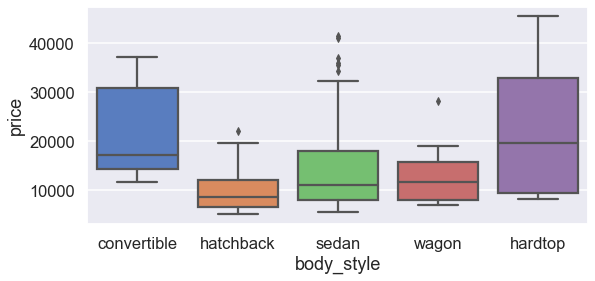

In [98]:
plt.figure(figsize=(8,4))
sns.boxplot(x='body_style', y='price', data=cars);

- Convertible and Hardtop are most expensive.
- Prices of Hardtop vary the most, even though there are only 8 such cars in the data.  
- Sedans have more cars with prices above 75th percentile going from 20k to above 40k.
- We even have an extreme outlier for wagon, seems to be a rare luxury wagon.
- Overall, we see except convertible, other types have a good overlap in range or prices.

#### Drive Wheels

In [104]:
cars['drive_wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive_wheels, dtype: int64

Front wheel drive is most common. Rare to have all four wheel drive

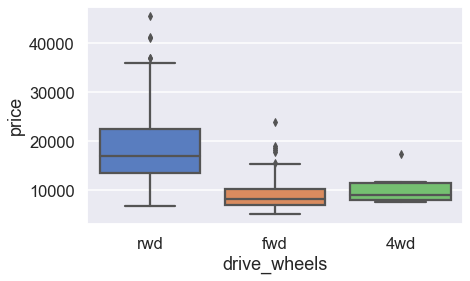

In [101]:
plt.figure(figsize=(6,4))
sns.boxplot(x='drive_wheels', y='price', data=cars);

#### Body-Style vs Drive-Wheels

In [105]:
cars.pivot_table(index='drive_wheels', columns='body_style', values='price', aggfunc='mean')

body_style,convertible,hardtop,hatchback,sedan,wagon
drive_wheels,,,,,
4wd,nan,nan,"7,603.00","12,647.33","9,095.75"
fwd,"11,595.00","8,249.00","8,396.39","9,811.80","9,997.33"
rwd,"23,949.60","24,202.71","14,337.78","21,711.83","16,994.22"


- Rear wheel drive are, on average, most expensive.  
- Hatchback and Wagon also have rear wheel drive available in lower end models.  
- Interestingly, all 4 wheel drive seems to be feature given in some economy models of sedan, wagon, hatchback.

#### Engine Location

In [102]:
cars['engine_location'].value_counts()

front    198
rear       3
Name: engine_location, dtype: int64

Quite rare to have engine at rear

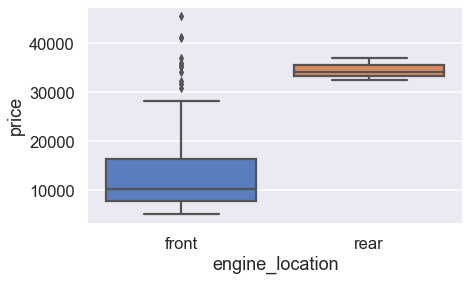

In [100]:
plt.figure(figsize=(6,4))
sns.boxplot(x='engine_location', y='price', data=cars);

Cars models with engine at rear are definitely high end.  
Cars models with engine at front does have quite a few outliers with prices going from 30k to 50k.

#### No of Cylinders

In [95]:
cars['cylinders'].value_counts()

four      157
six        24
five       10
eight       4
two         4
twelve      1
three       1
Name: cylinders, dtype: int64

4 cylinders is quite common. Few high end cars have 8 and 12 cylinders as well. Having 2 and 3 cylinders is quite uncommon

### Comparing Car Models

#### Price Comparison

In [107]:
cars_avg = cars.groupby('make').mean()
cars_avg['avg_mpg'] = (cars_avg['city_mpg'] + cars_avg['highway_mpg']) / 2

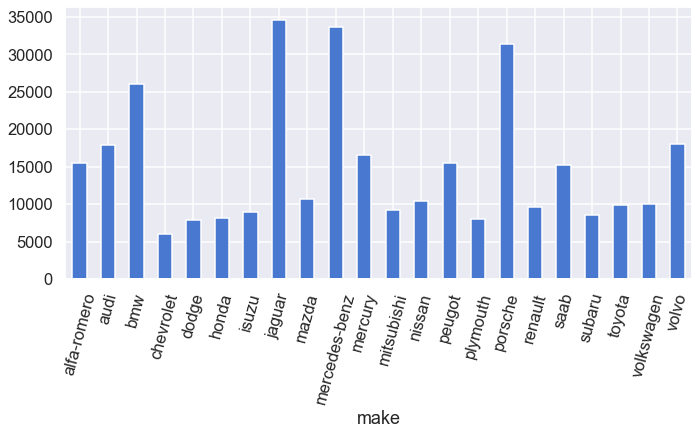

In [67]:
cars_avg.groupby('make')['price'].mean().plot.bar(figsize=(10,5))
plt.xticks(rotation=75);

Jaguar, Mercedes, Porsche and BMW takes the top 4 spots.

#### Mileage Comparison

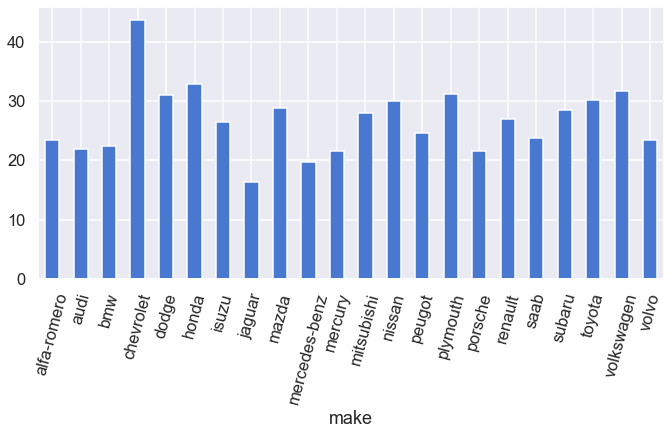

In [72]:
cars_avg.groupby('make')['avg_mpg'].mean().plot.bar(figsize=(10,5))
plt.xticks(rotation=75);

Pricier cars like Jaguar, Mercedes, Porsche, BMW, Audi also have the lowest mileage.

### Features Impacting the Price

#### Measuring Correlation

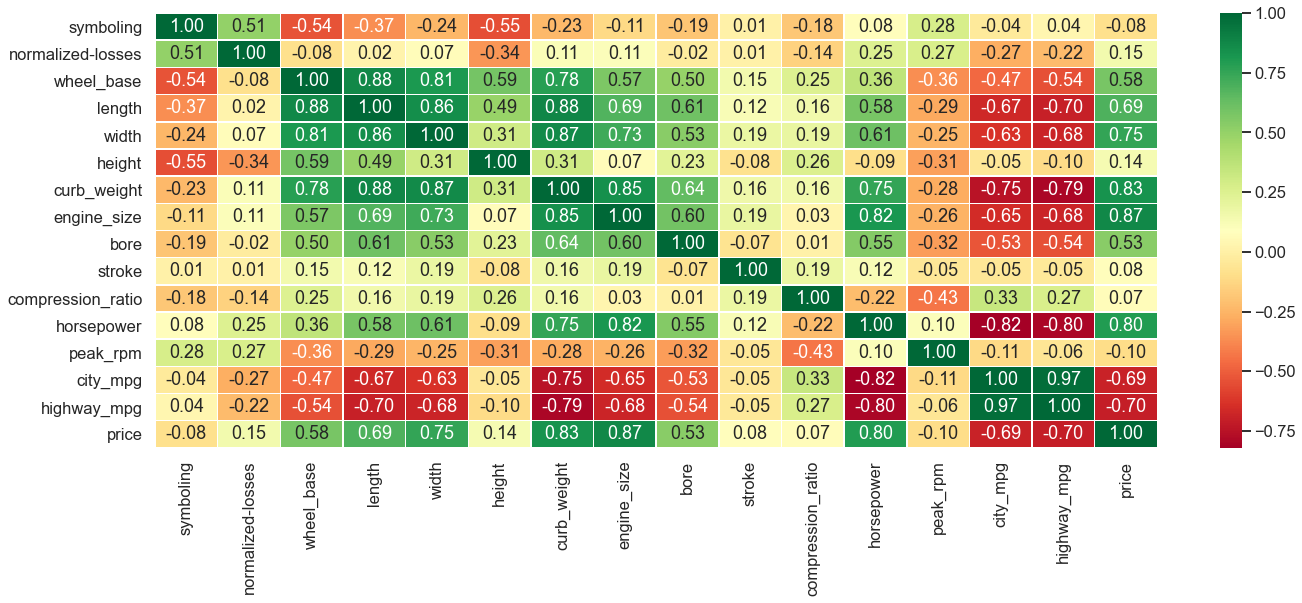

In [79]:
plt.figure(figsize=(20,8))
sns.heatmap(cars.corr( ), annot=True, fmt='.2f', linewidths=0.5, cmap='RdYlGn');

Correlation by itself does not tell us the strength or how significant is the relation.
Let's measure p-values as well alongside correlation.

In [117]:
num_cols = cars.select_dtypes(include='number').columns

In [119]:
cars_corr = pd.DataFrame(columns={'feature','corr_coeff','p-value'})
for column in num_cols:
    pearson_coef, p_value = stats.pearsonr(cars[column], cars['price'])
    cars_corr = cars_corr.append({'feature':column, 'corr_coeff':pearson_coef, 'p-value':p_value}, ignore_index=True)

cars_corr.sort_values(['corr_coeff'], ascending=False)

,corr_coeff,feature,p-value
15,1.00,price,0.00
7,0.87,engine_size,0.00
6,0.83,curb_weight,0.00
11,0.80,horsepower,0.00
4,0.75,width,0.00
3,0.69,length,0.00
2,0.58,wheel_base,0.00
8,0.53,bore,0.00
1,0.15,normalized-losses,0.03
5,0.14,height,0.06


**Observations**  

1) Features with statistically significant correlation and strong linear relationship (p-value < 0.001 and corr_coef > 0.75):  
(engine_size, curb_weight, horsepower, width)

2) Features with statistically significant correlation and moderate linear relationship (p-value < 0.001 and corr_coef between 0.50 - 0.75):  
(length, wheel_base, bore, city_mpg, highway_mpg)


Note: city_mpg and highway_mpg have negative relationship with price.  

We also see strong correlation among features like length, width, weight, wheel_base which form the overall car dimensions, and so increase and decrease in similar proportions together

#### Visualizing Relationship between Correlated Numerical Features and Price

Based on Correlation and its Significance measured above, we will select features ('engine_size','horsepower','width','wheel_base','length','city_mpg','highway_mpg','curb_weight','bore')  
and plot them against price to visualize the relationship

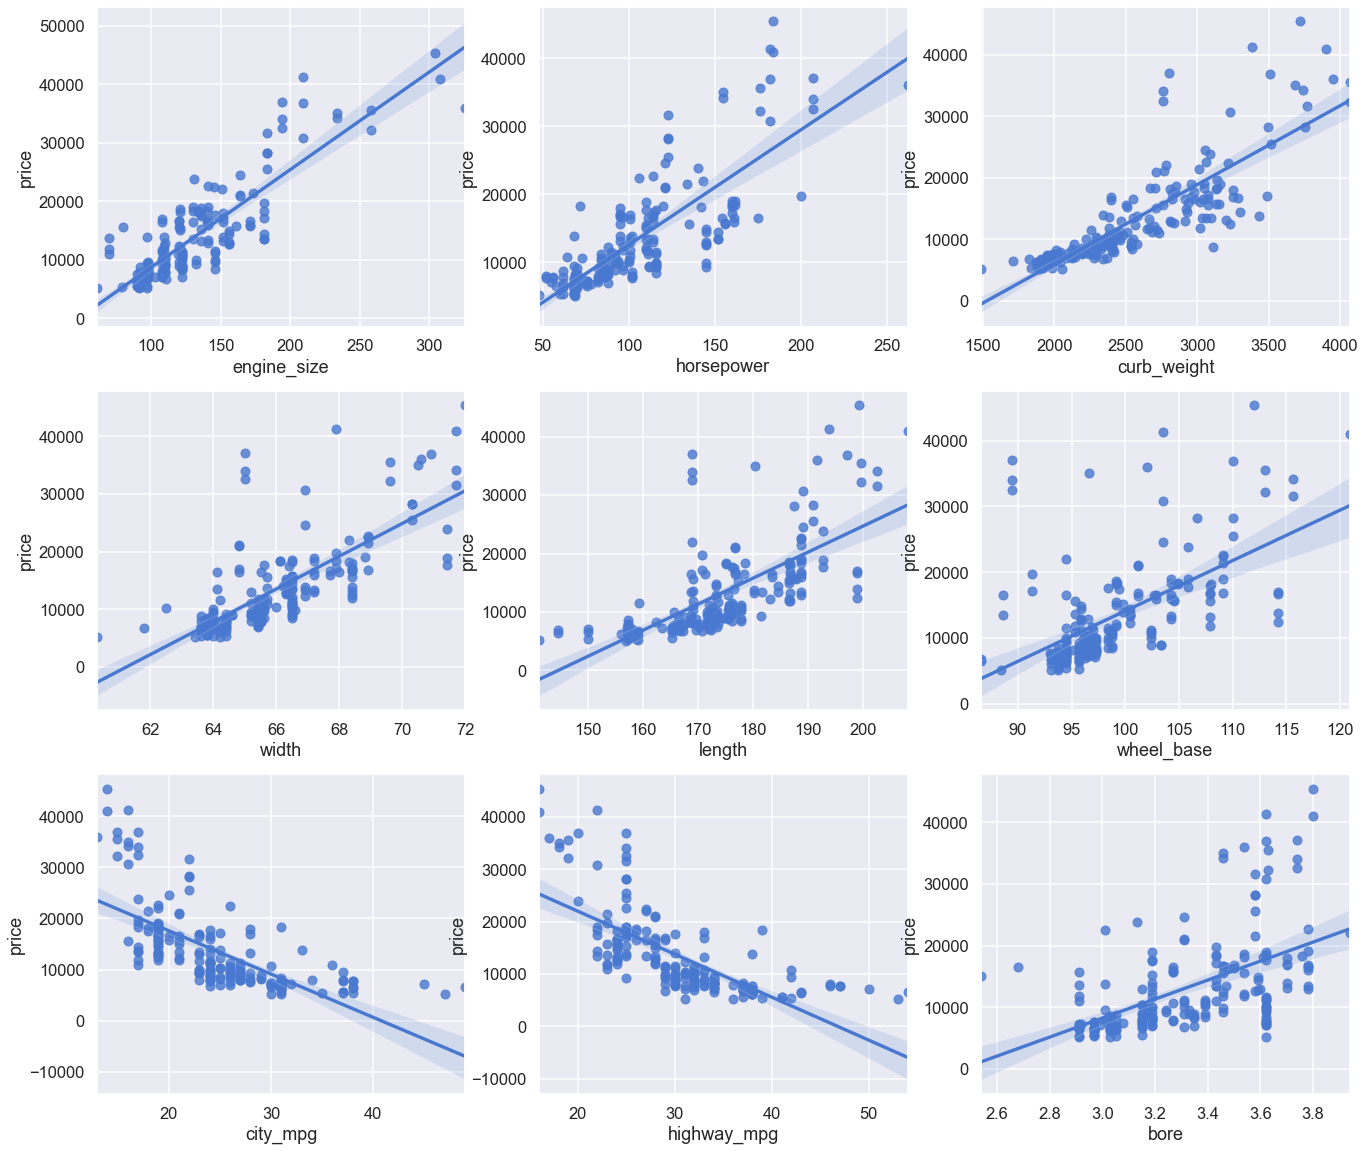

In [123]:
plt.figure(figsize=(20,20))

plt.subplot(331)
sns.regplot(x='engine_size', y='price', data=cars)

plt.subplot(332)
sns.regplot(x='horsepower', y='price', data=cars)

plt.subplot(333)
sns.regplot(x='curb_weight', y='price', data=cars)

plt.subplot(334)
sns.regplot(x='width', y='price', data=cars)

plt.subplot(335)
sns.regplot(x='length', y='price', data=cars)

plt.subplot(336)
sns.regplot(x='wheel_base', y='price', data=cars)

plt.subplot(337)
sns.regplot(x='city_mpg', y='price', data=cars)

plt.subplot(338)
sns.regplot(x='highway_mpg', y='price', data=cars)

plt.subplot(339)
sns.regplot(x='bore', y='price', data=cars);

We see that for features Length, Wheel Base and Bore, the data points are quite scattered around the regression line.  
This means these features have only moderate linear relationship to Price, which is what we also concluded measuring correlation and its significance earlier.

#### Measuring Predictive Power

Now, correlation is only calculated between numerical features.

We can calculate predictive power score, which lets us check the predictive power of all features(both numerical and categorical) in predicting the car price, and gives a good idea of which features would be important to choose for prediction.

In [ ]:
import ppscore as pps
cars_pps = pps.matrix(cars)

In [91]:
cars_pps[cars_pps['y'] == 'price'].sort_values('ppscore',ascending=False).drop('baseline_score',axis=1).style.background_gradient(cmap='Blues')

,x,y,ppscore,case,is_valid_score,metric,model_score,model
675,price,price,1.00,predict_itself,True,None,1.00,None
441,engine_size,price,0.60,regression,True,mean absolute error,2194.97,DecisionTreeRegressor()
571,horsepower,price,0.58,regression,True,mean absolute error,2280.48,DecisionTreeRegressor()
311,width,price,0.56,regression,True,mean absolute error,2384.33,DecisionTreeRegressor()
259,wheel_base,price,0.55,regression,True,mean absolute error,2431.36,DecisionTreeRegressor()
285,length,price,0.51,regression,True,mean absolute error,2641.64,DecisionTreeRegressor()
623,city_mpg,price,0.48,regression,True,mean absolute error,2832.72,DecisionTreeRegressor()
649,highway_mpg,price,0.45,regression,True,mean absolute error,3009.35,DecisionTreeRegressor()
363,curb_weight,price,0.41,regression,True,mean absolute error,3211.63,DecisionTreeRegressor()
77,make,price,0.38,regression,True,mean absolute error,3393.79,DecisionTreeRegressor()


Results are similar to what we see from measuring correlation and its significance  

- Car dimensions like length, width, wheel_base alongwith other indicators like curb weight, mileage, engine-size and horsepower seems to be most useful in predicting car prices.  


- Apart from numerical features, we see moderate score for categorical feature 'make' as well, but other categorical features like body style, wheel drive, fuel type does not seem to have much impact on price.  We can use ANOVA test to check the impact of body-style on price



### Statistical Test to measure impact of Categorical Variables on Price

#### Measuring impact of Body Style

In [132]:
cars['body_style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [145]:
body_style = cars.groupby('body_style')

In [146]:
f_val, p_val = stats.f_oneway(body_style.get_group('convertible')['price'], body_style.get_group('hatchback')['price'],\
                              body_style.get_group('sedan')['price'], body_style.get_group('wagon')['price'],\
                              body_style.get_group('hardtop')['price'])
   
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 9.12875185470821 , P = 8.779795237614595e-07


F-value is not large enough to show high correlation between body-style and price.  
Reason again could be that we do not have enough convertible and hardtop models in data, and the average price difference between remaining three is not much. Let's check the F-value for hatchback, sedan, wagon

In [147]:
f_val, p_val = stats.f_oneway(body_style.get_group('hatchback')['price'], body_style.get_group('sedan')['price'], body_style.get_group('wagon')['price'])
   
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 8.626853682554598 , P = 0.00026230217494082415


So, the F-value only changes a bit, confirming our assumption that impact of these three body styles is quite low.

#### Measuring impact of Wheel Drive

In [148]:
cars['drive_wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [149]:
drive_wheels = cars.groupby('drive_wheels')

In [150]:
f_val, p_val = stats.f_oneway(drive_wheels.get_group('fwd')['price'], drive_wheels.get_group('rwd')['price'],\
                              drive_wheels.get_group('4wd')['price'])
   
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


Large F-value shows a strong correlation and a P value of almost 0 implying certain statistical significance.  
But again we do not have enough variance here, as most of the values are 'fwd' only

#### Measuring impact of Fuel Type

In [151]:
cars['fuel_type'].unique()

array(['gas', 'diesel'], dtype=object)

In [152]:
fuel_type = cars.groupby('fuel_type')

In [153]:
f_val, p_val = stats.f_oneway(fuel_type.get_group('gas')['price'], fuel_type.get_group('diesel')['price'])
   
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 2.4520196354787864 , P = 0.11896254438091516


Very small F-value and high P-value, means no impact of Fuel Type on Price.

#### Measuring impact of Aspiration

In [154]:
cars['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [155]:
aspiration = cars.groupby('aspiration')

In [156]:
f_val, p_val = stats.f_oneway(aspiration.get_group('std')['price'], aspiration.get_group('turbo')['price'])
   
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 6.631286341771227 , P = 0.010745853841804088


Small F-value and P-value right at threshold, means impact is very low.

***Conclusion - Important Features***

We now have a good idea of what our data looks like and which features are important to take into account when predicting the car price, which are

- Continuous numerical variables: Length, Width, Curb-weight, Engine-size, Horsepower, City-mpg, Highway-mpg, Wheel-base, Bore
    
- Categorical variables: None of the categorical variables are strongly correlated to price.

## Predicting Car Prices

For creating a model to predict car prices, we will perform below sequence of steps:

1) Create copy of data with selected features 

2) Split this data into Train-Test sets.  

3) Perform Data preprocessing like Scaling

4) Use cross validation on Train data set, which will further divide this data into train and validation set multiple times, so    that entire training set gets used for training and validation wihtout impacting the test set which we separated. Thus, 
   using cross validation we can compare several base models for spot checking and selecting a few for further optmization.  
   
5) Perform Hyperparameter search to get best parameters for our selected model.

In [266]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

### Train-Test Split

In [190]:
cars.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel_type', 'aspiration',
       'doors', 'body_style', 'drive_wheels', 'engine_location', 'wheel_base',
       'length', 'width', 'height', 'curb_weight', 'engine_type', 'cylinders',
       'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

In [334]:
X = cars[['wheel_base', 'length', 'width', 'curb_weight', 'engine_size', 'bore', 'horsepower', 'city_mpg', 'highway_mpg']]
y = cars['price']

In [335]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 3)

In [336]:
X_train.shape
X_test.shape

(160, 9)

(41, 9)

### Spot Checking Base Algorithms

In [337]:
models = [KNeighborsRegressor(n_neighbors=2), Ridge(), Lasso(), RandomForestRegressor(), ExtraTreesRegressor()]

for model in models:
    folds = KFold(n_splits=5, shuffle=True, random_state=3)
    scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=folds)
    print(str(model) +': ', scores.mean())

KNeighborsRegressor(n_neighbors=2):  0.7420887095859922
Ridge():  0.7375431792364902
Lasso():  0.7376285305762632
RandomForestRegressor():  0.8974711343282833
ExtraTreesRegressor():  0.8959560215931477


In [302]:
scaler = StandardScaler()
X_train_scaled = col_transformer.fit_transform(X_train)
X_test_scaled = col_transformer.transform(X_test)

In [338]:
models = [KNeighborsRegressor(n_neighbors=2), Ridge(), Lasso(), RandomForestRegressor(), ExtraTreesRegressor()]

for model in models:
    folds = KFold(n_splits=5, shuffle=True, random_state=3)
    scores = cross_val_score(model, X_train_scaled, y_train, scoring='r2', cv=folds)
    print(str(model) +': ', scores.mean())

KNeighborsRegressor(n_neighbors=2):  0.8245914558135551
Ridge():  0.7411457734615471
Lasso():  0.7376856527867162
RandomForestRegressor():  0.8942455323609886
ExtraTreesRegressor():  0.8980167486913491


Scaling the data only seems to impact on KNN model's score which gets a good bump, but the rest are negligibly impacted.

**RandomForestRegressor** seems to be the best performing model, so we will use this for our prediction.

### Prediction with all features

First, let's try prediction using all numerical features we already selected above.

In [343]:
model = RandomForestRegressor(random_state=3)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R2:', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

RandomForestRegressor(random_state=3)

R2: 0.9361876774451842
RMSE: 2287.943417622966


We have got a great R2 and RMSE scores.  
- R2 score of 0.94 means that 94% of variation in car price variable is explained by the features.  
- RMSE score of 2287 means that on average our model is only off by 2287 USD for the predicted price values, which is very good considering prices are in tens of thousands.

### Prediction with top correlated features

Now, let's try prediction with top features impacting price. Based on correlation significance and predictive power, we can select (engine_size, width, horsepower).  

In [333]:
estimator = RandomForestRegressor()

estimator.fit(X_train[['engine_size','horsepower','width']].values.reshape(-1,3), y_train)
y_pred = estimator.predict(X_test[['engine_size','horsepower','width']].values.reshape(-1,3))
print('R2:', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

RandomForestRegressor()

R2: 0.9439883815227911
RMSE: 2143.5423334943616


Top 3 features themselves give us equivalent scores

### Visualizing Actual vs Predicted Values Distribution

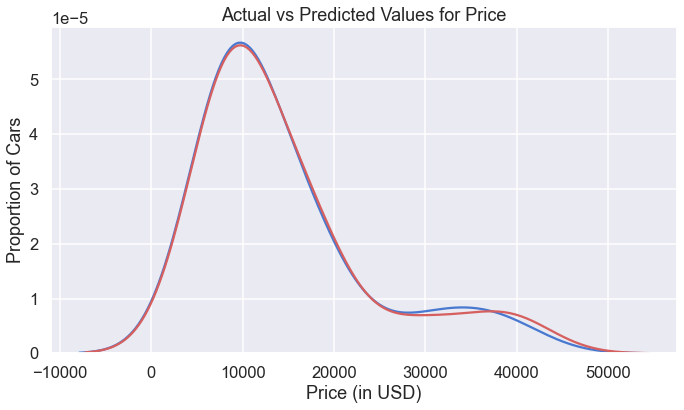

In [353]:
plt.figure(figsize=(10, 6))
ax1 = sns.distplot(y_test, hist=False, color="b", label="Actual Value")
sns.distplot(y_pred, hist=False, color="r", label="Predicted Values" , ax=ax1)
plt.title('Actual vs Predicted Values for Price')
plt.xlabel('Price (in USD)')
plt.ylabel('Proportion of Cars')
plt.show();

We see that till 25K USD model is able to quite perfectly predict the prices. Only above this price point, there are some errors, which could be due to the fact that there are not enough data points with prices at higher end to learn from

### Conclusion

Among 26 features in the original dataset, we find that just 3 attributes - Car Size(width), Engine Size and Car Power are able to predict Price very accurately.